In [1]:
#导包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
#获取数据集
data = pd.read_csv('./GOOG.csv', date_parser = True)
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
5,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128600
6,2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241200
7,2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221400
8,2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941200
9,2004-09-01,51.158245,51.292744,49.648903,49.937820,49.937820,9181600


In [3]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999901,0.999863,0.999757,0.999757,-0.552545
High,0.999901,1.000000,0.999842,0.999876,0.999876,-0.550987
Low,0.999863,0.999842,1.000000,0.999904,0.999904,-0.554739
Close,0.999757,0.999876,0.999904,1.000000,1.000000,-0.552944
Adj Close,0.999757,0.999876,0.999904,1.000000,1.000000,-0.552944
Volume,-0.552545,-0.550987,-0.554739,-0.552944,-0.552944,1.000000


In [4]:
#划分训练集
data_training = data[data['Date']<'2018-01-01'].copy()#此前的额数据用于训练
data_test = data[data['Date']>='2018-01-01'].copy()#此后的数据用于测试

In [5]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3366,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
3367,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
3368,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3369,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
3370,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [6]:
data_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [7]:
data.var()

Open         1.059958e+05
High         1.076894e+05
Low          1.043343e+05
Close        1.061095e+05
Adj Close    1.061095e+05
Volume       6.575415e+13
dtype: float64

In [8]:
#删除两列不用于训练的数据
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [9]:
#数据处理，
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training[0:5]

array([[3.93340685e-04, 1.12440145e-03, 0.00000000e+00, 1.60015108e-04,
        5.43577404e-01],
       [8.83807473e-04, 3.55736583e-03, 2.22645901e-03, 4.02454442e-03,
        2.77885613e-01],
       [5.61363940e-03, 5.68984567e-03, 6.41945559e-03, 4.55306920e-03,
        2.22150736e-01],
       [5.85158573e-03, 4.77869570e-03, 3.73201370e-03, 2.35654020e-03,
        1.85522018e-01],
       [2.80196296e-03, 3.03393929e-03, 3.88404237e-03, 2.90446300e-03,
        1.11762967e-01]])

In [10]:
X_train = []
y_train = []

In [11]:
#将数据集录入输入矩阵
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print(X_train.shape)
print(y_train.shape)

(3306, 60, 5)
(3306,)


In [14]:
#导包建立LSTM网络
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [15]:
model = Sequential()

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [16]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
52/52 [==============================] - 21s 249ms/step - loss: 0.0264
Epoch 2/10
52/52 [==============================] - 12s 231ms/step - loss: 0.0025
Epoch 3/10
52/52 [==============================] - 12s 229ms/step - loss: 0.0021
Epoch 4/10
52/52 [==============================] - 10s 198ms/step - loss: 0.0020
Epoch 5/10
52/52 [==============================] - 10s 189ms/step - loss: 0.0018
Epoch 6/10
52/52 [==============================] - 9s 180ms/step - loss: 0.0017 4s -  - ETA: 2s 
Epoch 7/10
52/52 [==============================] - 10s 183ms/step - loss: 0.0016
Epoch 8/10
52/52 [==============================] - 10s 186ms/step - loss: 0.00151s - lo
Epoch 9/10
52/52 [==============================] - 10s 186ms/step - loss: 0.0015
Epoch 10/10
52/52 [==============================] - 10s 188ms/step - loss: 0.0014


In [18]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3366,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
3367,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
3368,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3369,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
3370,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [19]:
data_training = data[data['Date']<'2018-01-01'].copy()

past_60_days = data_training.tail(60)
#设置测试集
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,955.489990,970.909973,955.179993,969.960022,1213800
1,966.700012,979.460022,963.359985,978.890015,1173900
2,980.000000,985.424988,976.109985,977.000000,891400
3,980.000000,981.570007,966.080017,972.599976,968400
4,973.719971,990.710022,972.250000,989.250000,1693300


In [20]:
#对测试集进行标准化
inputs = scaler.transform(df)
inputs

array([[0.88329976, 0.89533083, 0.89331022, 0.89567047, 0.01461102],
       [0.89422794, 0.90364953, 0.90136339, 0.90436297, 0.01412758],
       [0.90719354, 0.9094531 , 0.9139157 , 0.90252322, 0.01070473],
       ...,
       [1.11871827, 1.11528395, 1.10606948, 1.09684404, 0.01947328],
       [1.10216519, 1.10757832, 1.09734687, 1.10774613, 0.01954719],
       [1.11375627, 1.12935266, 1.12367225, 1.12835315, 0.01227612]])

In [21]:
X_test = []
y_test = []
#输入
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [22]:
#查看测试集大小
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((443, 60, 5), (443,))

In [23]:
y_pred = model.predict(X_test)

In [24]:
#获取缩放比例
scaler.scale_

array([9.74858259e-04, 9.72942515e-04, 9.84494974e-04, 9.73404878e-04,
       1.21162775e-08])

In [25]:
scale = 1/9.74858259e-04
scale

1025.790150278657

In [26]:
#将预测结果转为正常大小
y_pred = y_pred*scale
y_test = y_test*scale

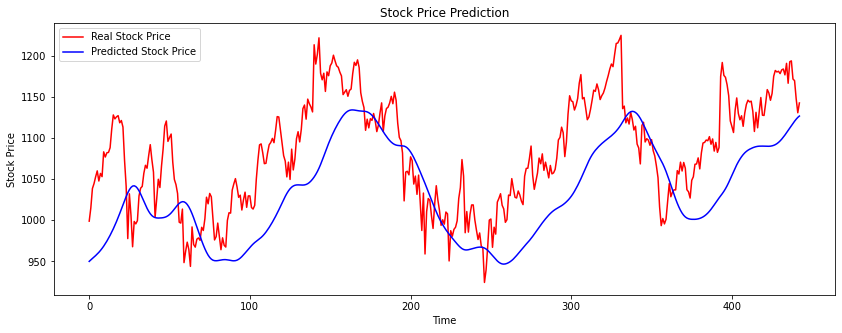

In [27]:
#将结果可视化
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
data_test2 = pd.read_csv('./Tesla.csv', date_parser = True)
data_test2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [29]:
#设置测试集
df2 = data_test2
df2 = df2.drop(['Date', 'Adj Close'], axis = 1)
df2.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [30]:
#对测试集进行标准化
inputs = scaler.transform(df2)
inputs

array([[-0.02964525, -0.0249852 , -0.02979164, -0.0252387 ,  0.22728198],
       [-0.02302596, -0.01971185, -0.02412095, -0.02529711,  0.20814795],
       [-0.0237961 , -0.02409009, -0.02710396, -0.02711737,  0.09948554],
       ...,
       [ 0.20237102,  0.20462923,  0.20326786,  0.20043548,  0.05826354],
       [ 0.20763525,  0.20925071,  0.20798359,  0.20658739,  0.0859347 ],
       [ 0.20919503,  0.20884206,  0.21009042,  0.20605203,  0.07836808]])

In [31]:
X_test2 = []
y_test2 = []
#输入
for i in range(60, inputs.shape[0]):
    X_test2.append(inputs[i-60:i])
    y_test2.append(inputs[i, 0])

In [32]:
#查看测试集大小
X_test2, y_test2 = np.array(X_test2), np.array(y_test2)
X_test2.shape, y_test2.shape

((1632, 60, 5), (1632,))

In [33]:
y_pred2 = model.predict(X_test2)

In [34]:
#获取缩放比例
scaler.scale_

array([9.74858259e-04, 9.72942515e-04, 9.84494974e-04, 9.73404878e-04,
       1.21162775e-08])

In [35]:
scale = 1/9.74858259e-04
scale

1025.790150278657

In [36]:
#将预测结果转为正常大小
y_pred2 = y_pred2*scale
y_test2 = y_test2*scale

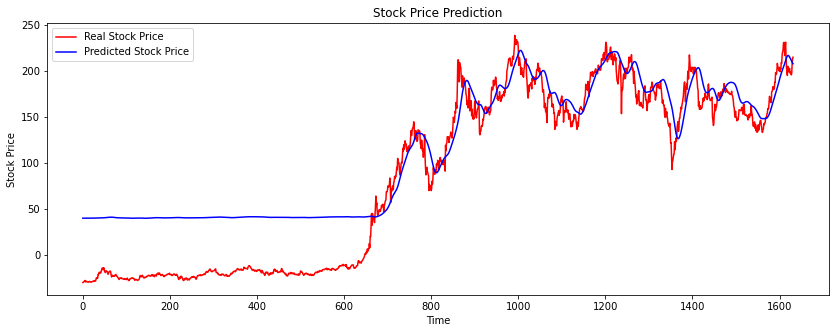

In [37]:
#将结果可视化
plt.figure(figsize=(14,5))
plt.plot(y_test2, color = 'red', label = 'Real Stock Price')
plt.plot(y_pred2, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()